In [ ]:
!pip install -U imbalanced-learn
!pip install empiricaldist
!pip install streamlit -q

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import sklearn
import scipy
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn import metrics

# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


import pickle

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# for styling
plt.style.use('seaborn-whitegrid')


from empiricaldist import Pmf
from empiricaldist import Cdf

# from google.colab import files
# import io

# for Modeling
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import scale ,minmax_scale ,MinMaxScaler
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
# import pydotplus
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pip install --user xgboost


Note: you may need to restart the kernel to use updated packages.


# EDA and Visualization¶


#Loading The Data


In [ ]:
Bank=pd.read_csv("OneDrive/Desktop/bank-full.csv")

In [ ]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
Bank.shape

(45211, 17)

In [ ]:
#statistical summary

In [ ]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Our dataset do not have any null/nan/missing values.

In [ ]:
catogorical_Bank = Bank.select_dtypes(include= object)
cat_columns = catogorical_Bank.columns
catogorical_features = list(cat_columns)
catogorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
for feature in catogorical_features:
    print(feature,len(Bank[feature].unique()))

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


job and month has the highest number of categorical values.

In [ ]:
for feature in catogorical_features:
    print(feature.title())

Job
Marital
Education
Default
Housing
Loan
Contact
Month
Poutcome
Y


In [ ]:
numeric__Bank = Bank.select_dtypes(include=np.number)
numeric_columns= numeric__Bank.columns
numeric_features = list(numeric_columns)
numeric_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
for feature in numeric_features:
    print(feature,len(Bank[feature].unique()))

age 77
balance 7168
day 31
duration 1573
campaign 48
pdays 559
previous 41


balance and duration has the highest number of unique values.

Text(0.5, 0, 'Target class')

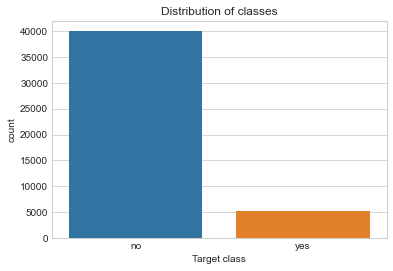

In [ ]:
from matplotlib import pyplot as plt
sns.countplot(x=Bank['y'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

Our dataset is highly imbalanced.


# The Count Plot for Each Catagorical Feature

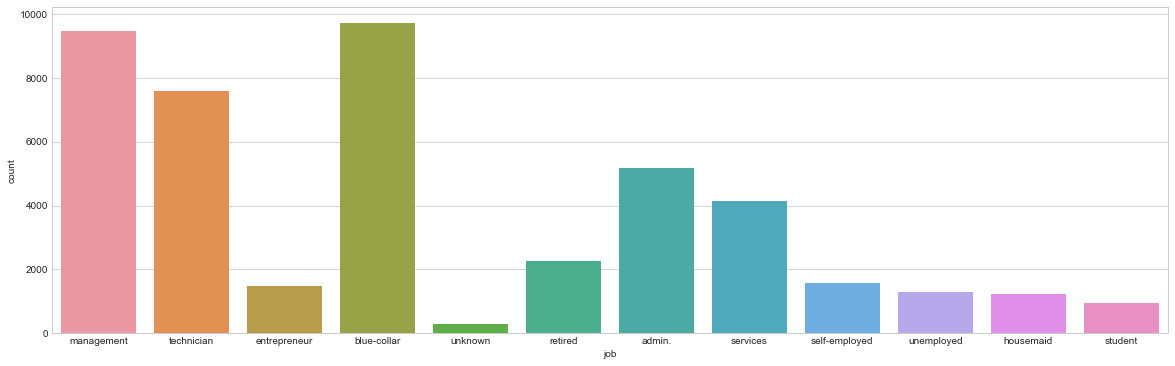

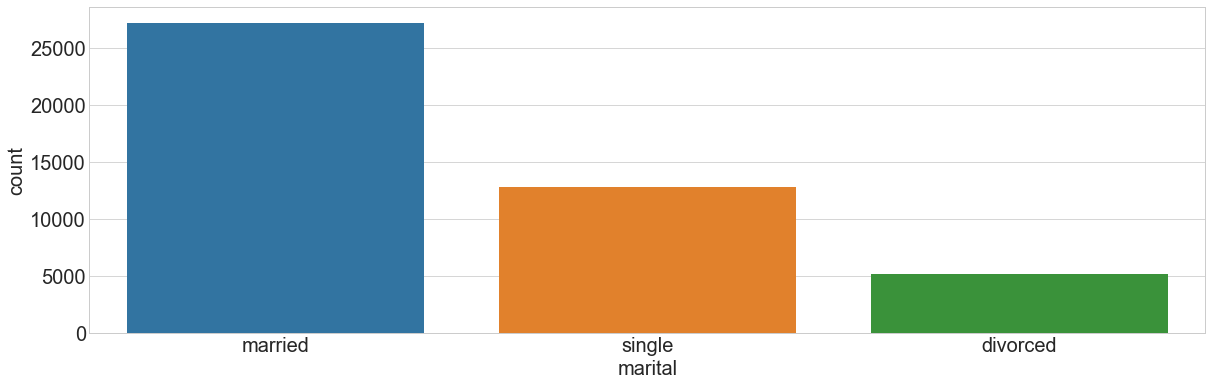

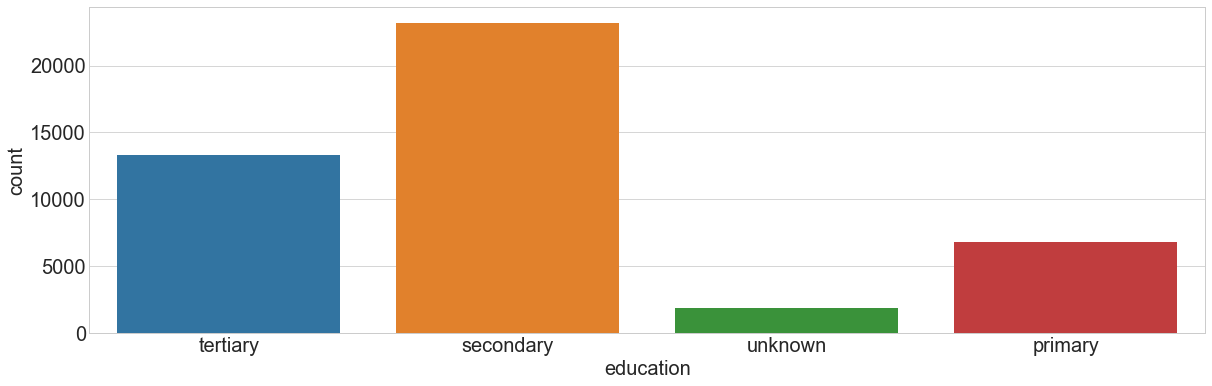

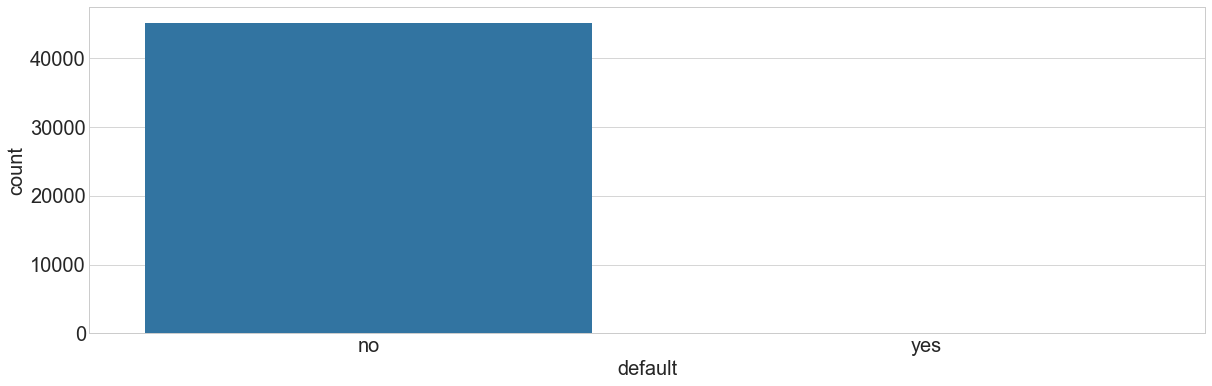

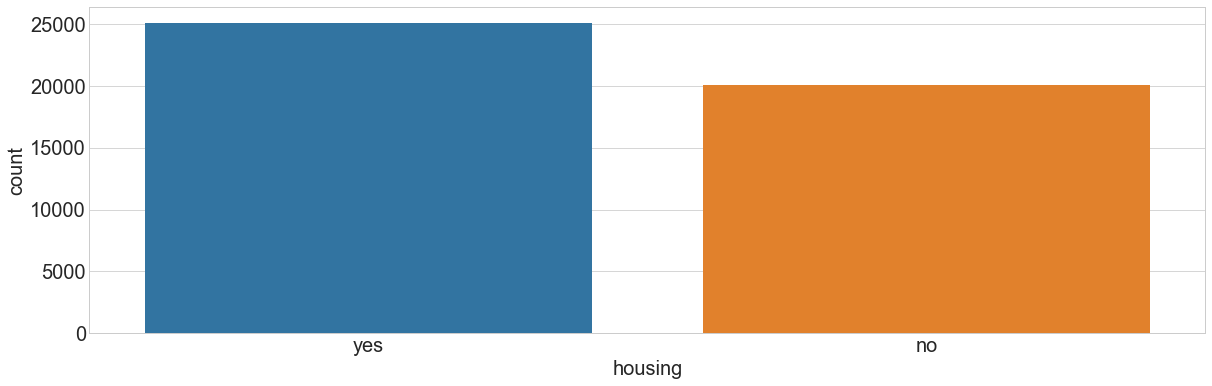

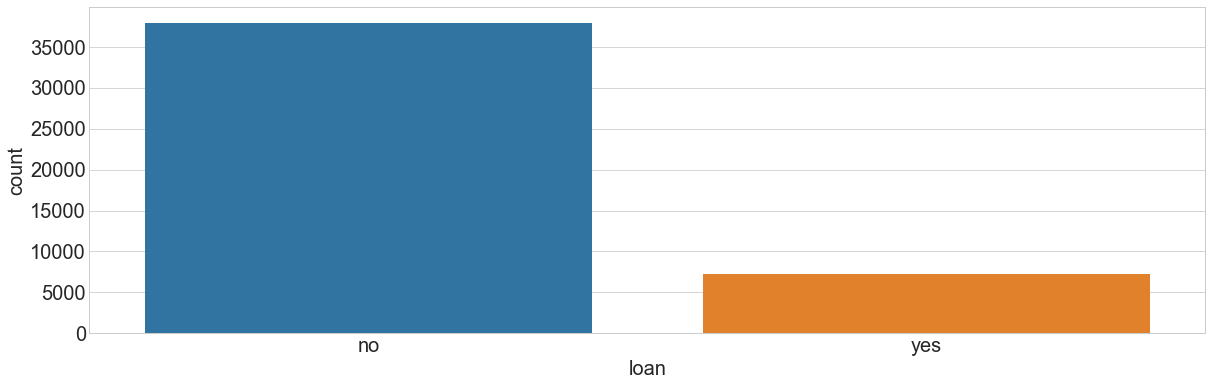

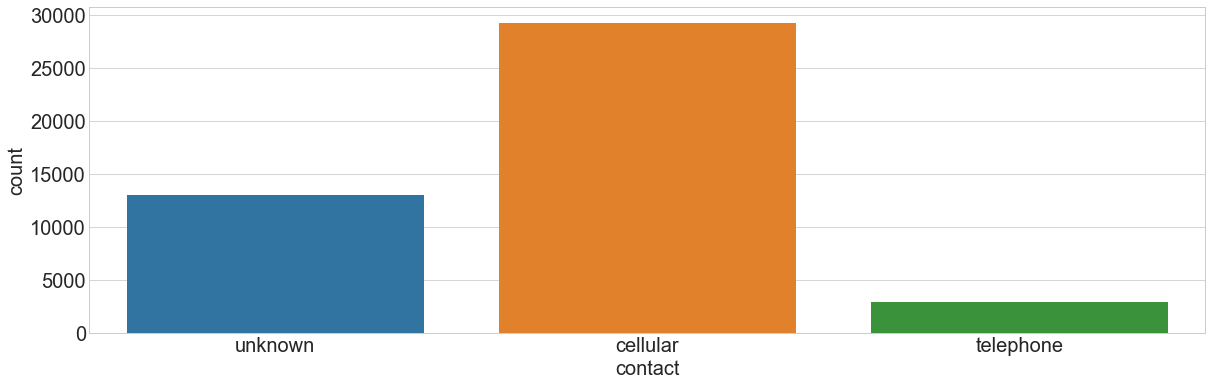

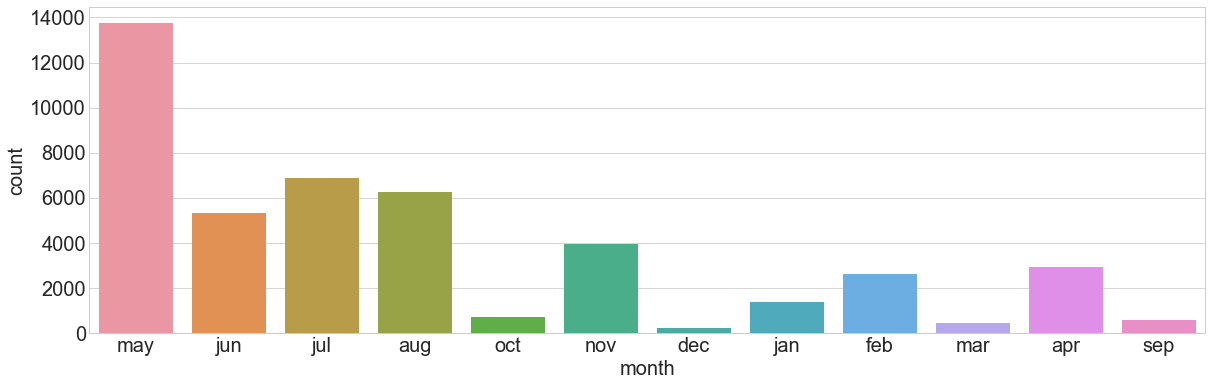

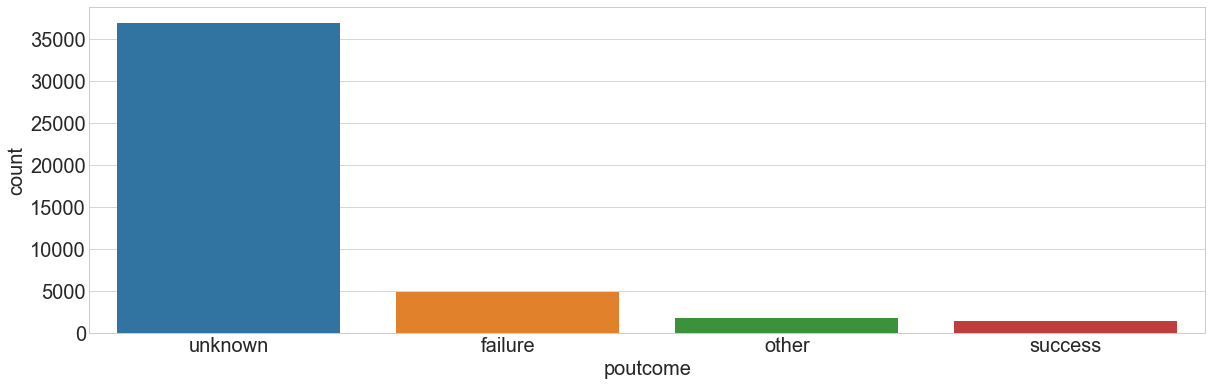

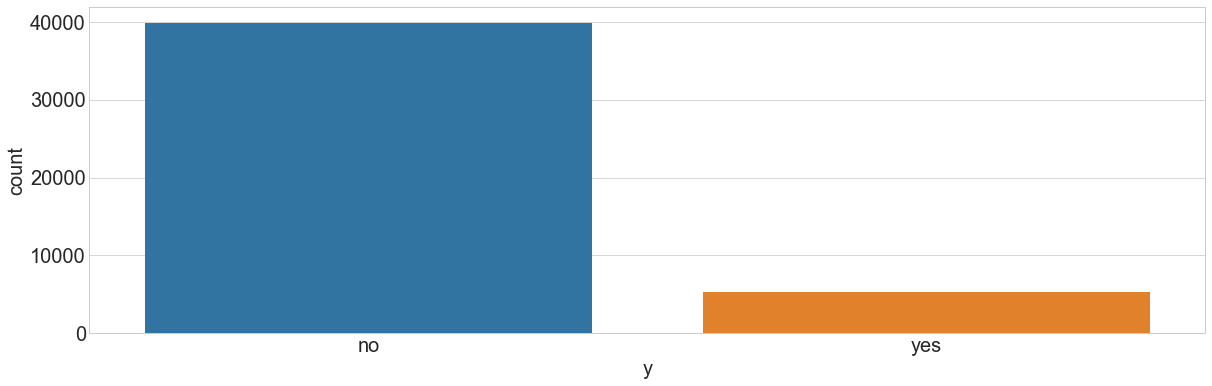

In [ ]:
for feature in catogorical_features:
    fig = plt.subplots(figsize=(20, 6))
    plt.rcParams.update({'font.size': 20})
    data = Bank[feature].value_counts()
    countplot = sns.countplot(x=feature, data=Bank)
    plt.show()
    print("                                                                                                         ")

# The Count Plots To Show Target Counts With Respect To The Numerical Features

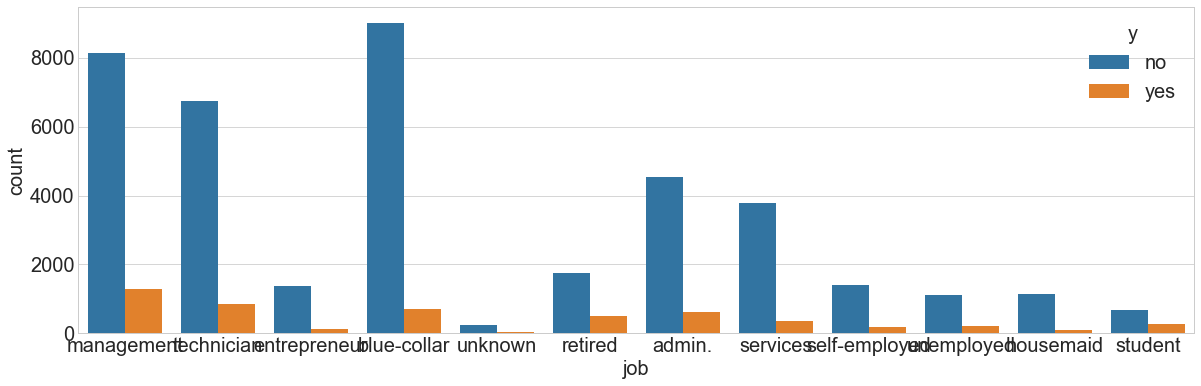

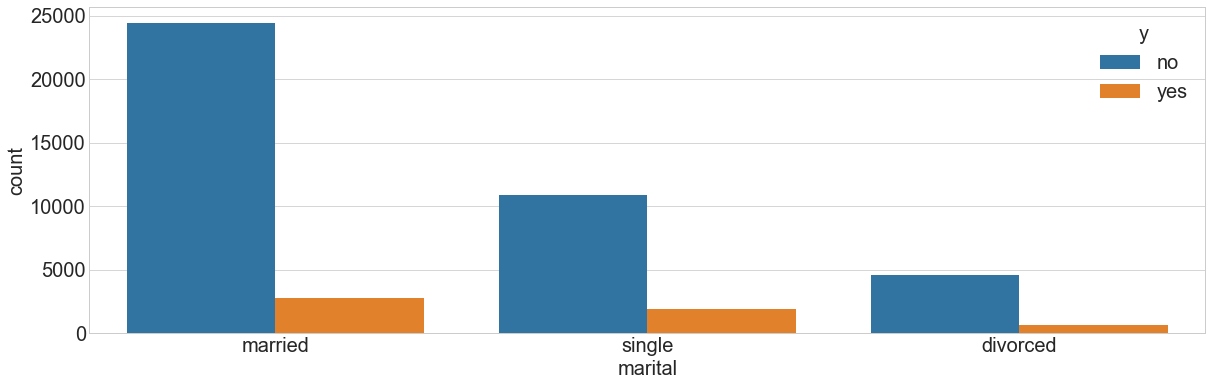

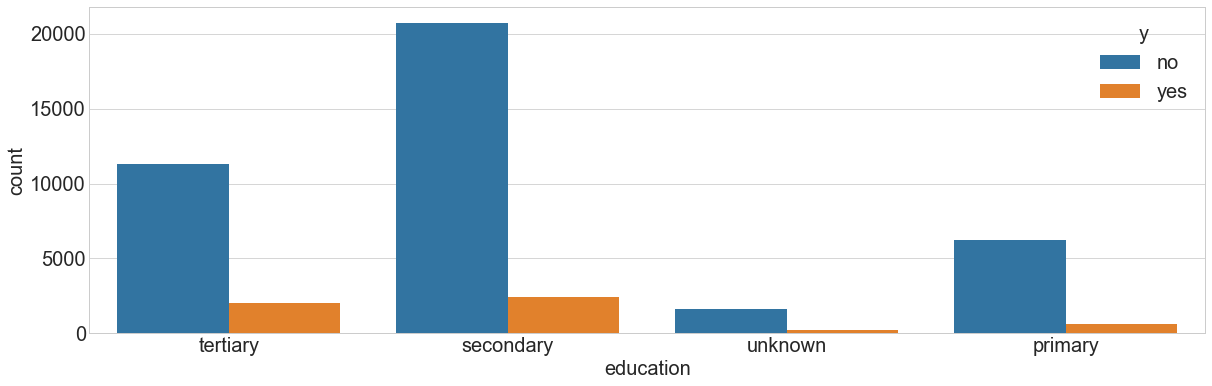

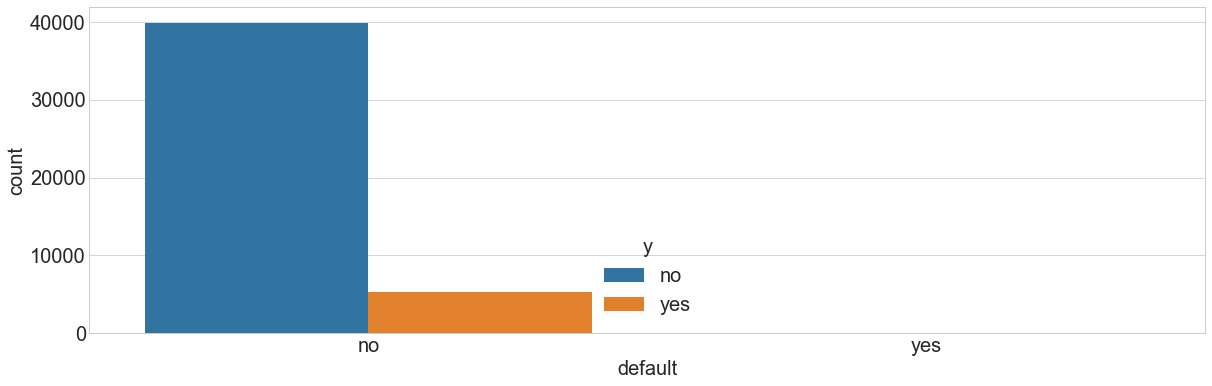

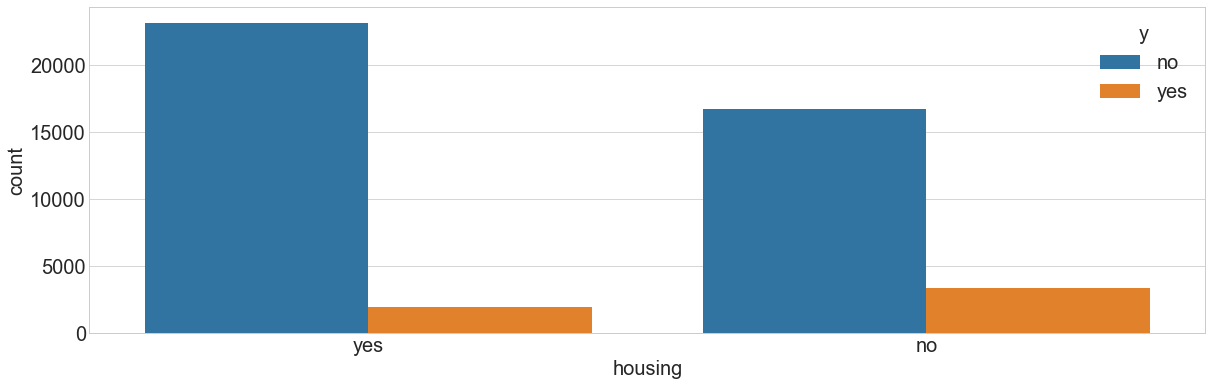

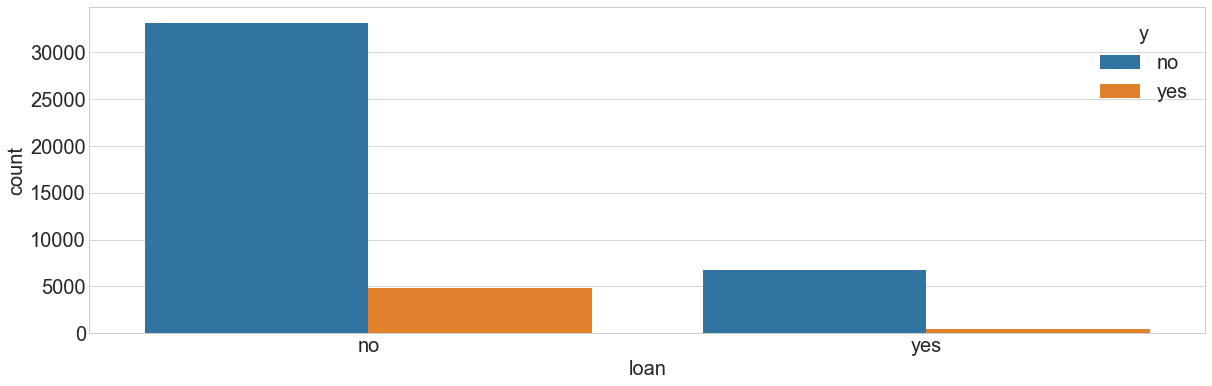

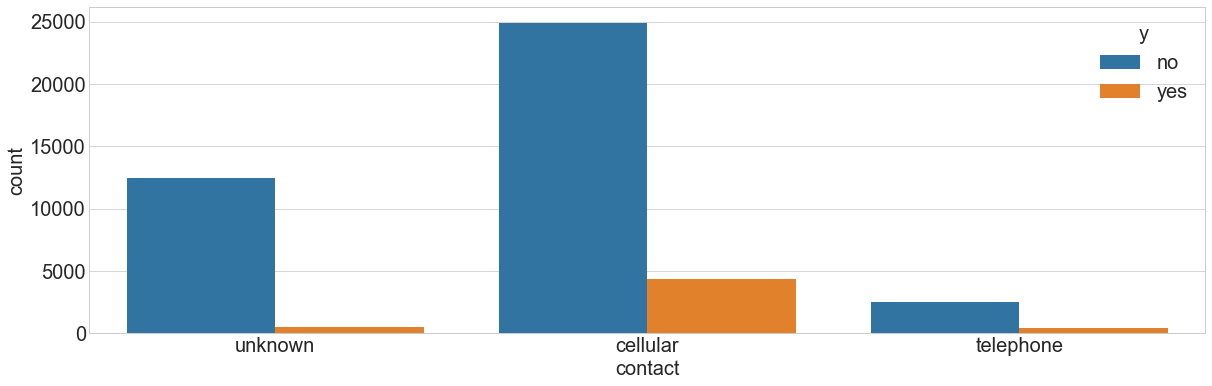

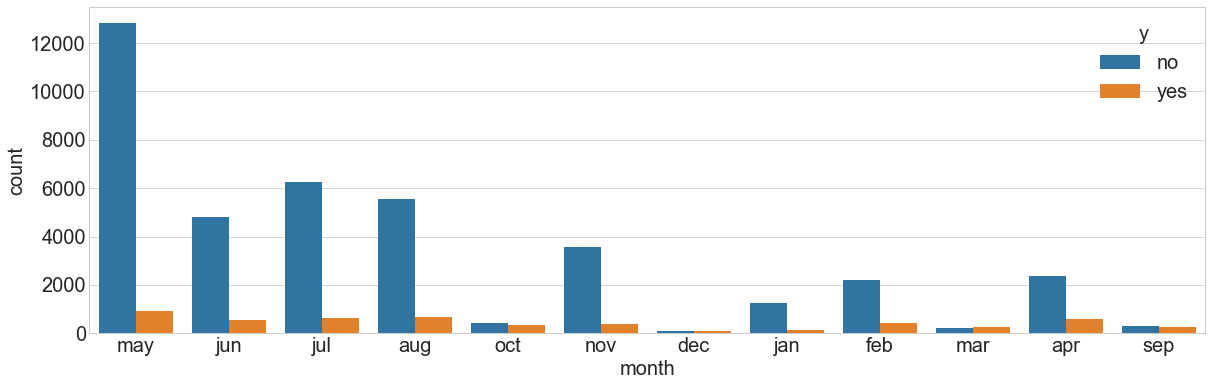

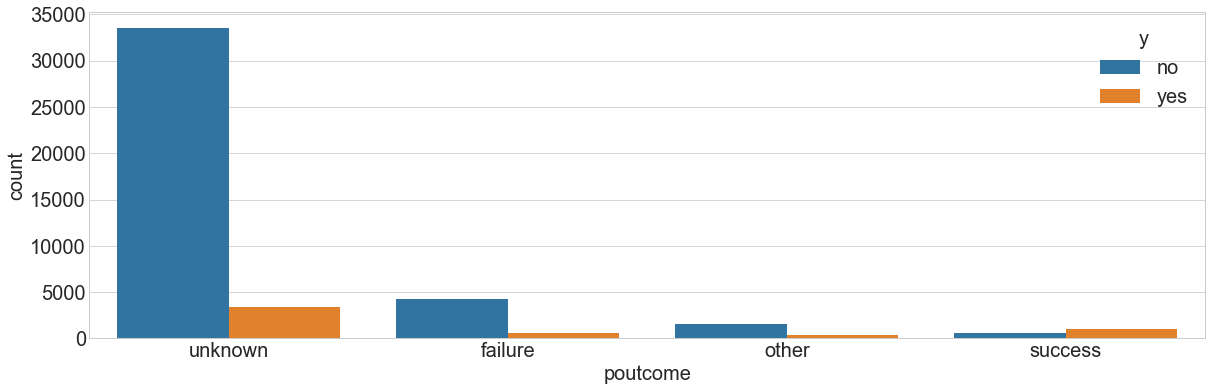

In [ ]:
modified_cat_features = catogorical_features[:9]

for feature in modified_cat_features:
    fig = plt.subplots(figsize=(20, 6))
    plt.rcParams.update({'font.size': 20})
    data = Bank[feature].value_counts()
    countplot = sns.countplot(x=feature, data=Bank, hue="y")
    plt.show()
    print("                                                                                                                   ")

# The Histograms And KDE Curves Of All The Numerical Features

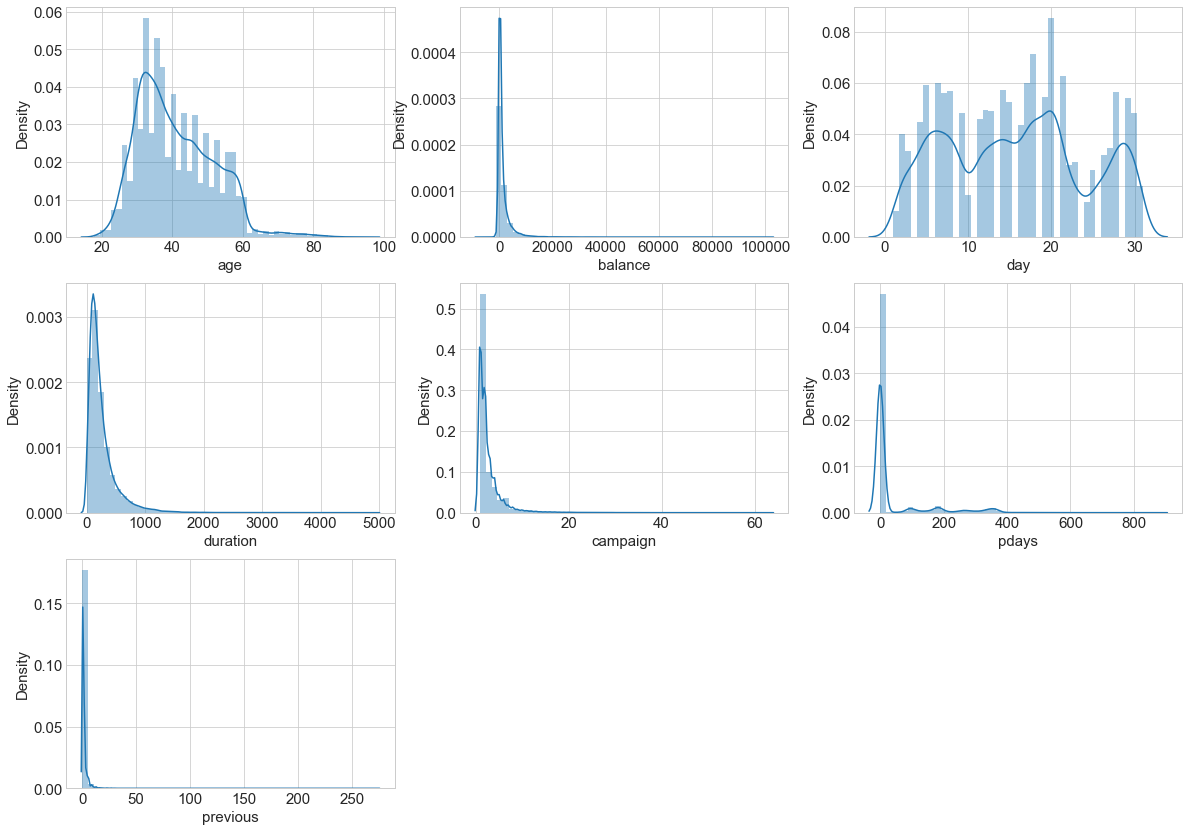

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in numeric_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Bank[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

# Inference:
 pdays and duration seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no and there are no outliers in these.

 Most contacted clients are from job type: 'blue-collar', 'management' & 'technician'

 Most of the clients contacted have previous outcome as 'unknown'.

 Most of the people contacted have tertiray or secondary education.

 only few clients contacted who are defaulter


only few clients contacted have loan

Most of the people are contacted through cellular

Most of the clients are contacted in the month of May however the success rate is more during march.

# The Boxplot of Each Numerical Feature¶


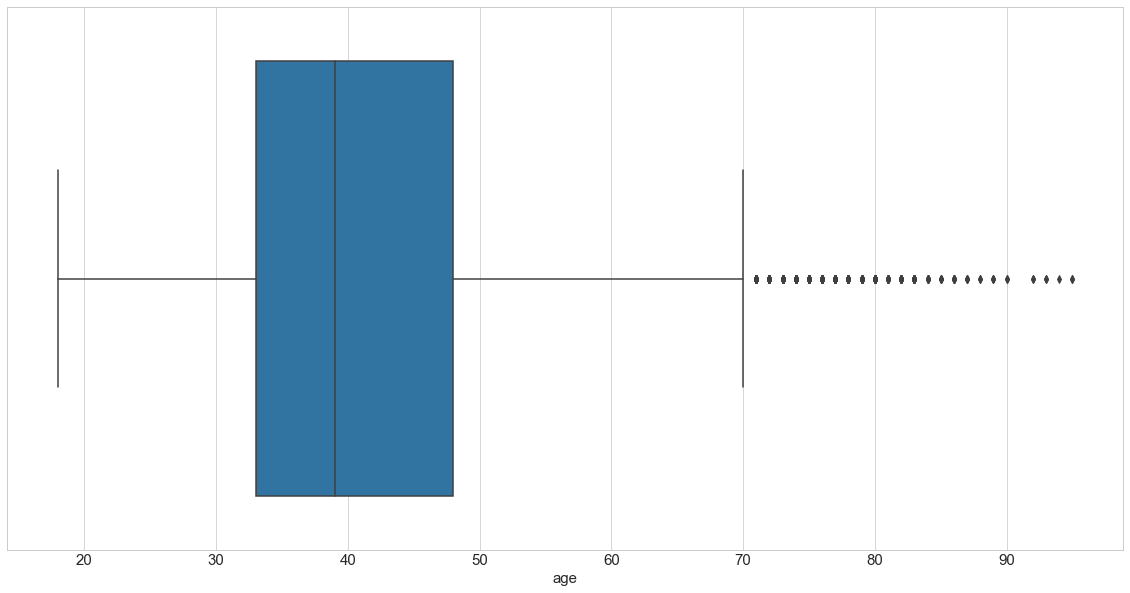

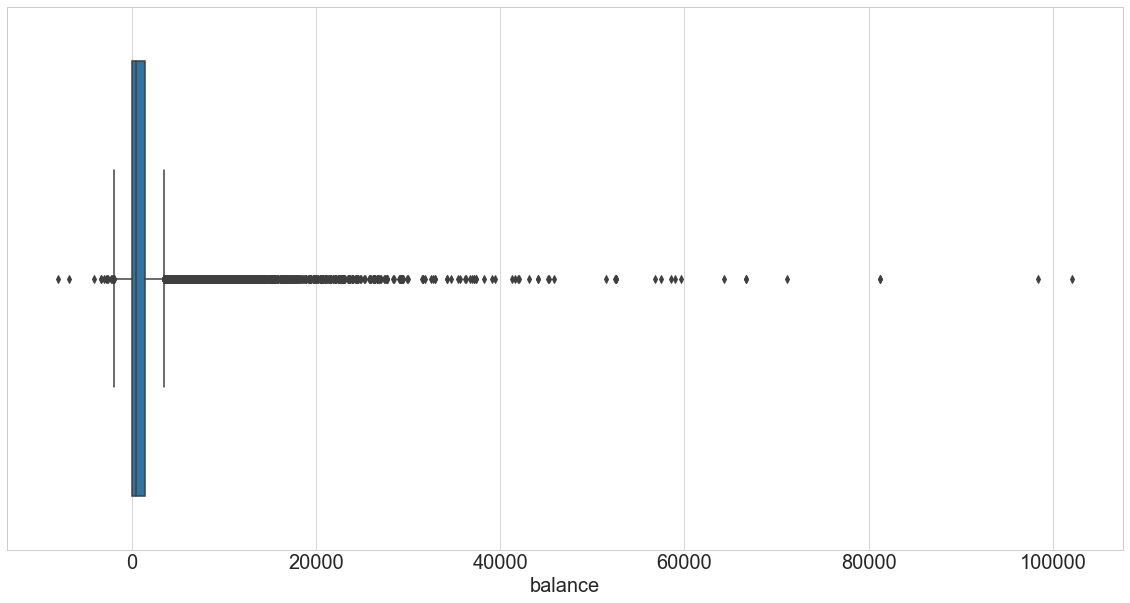

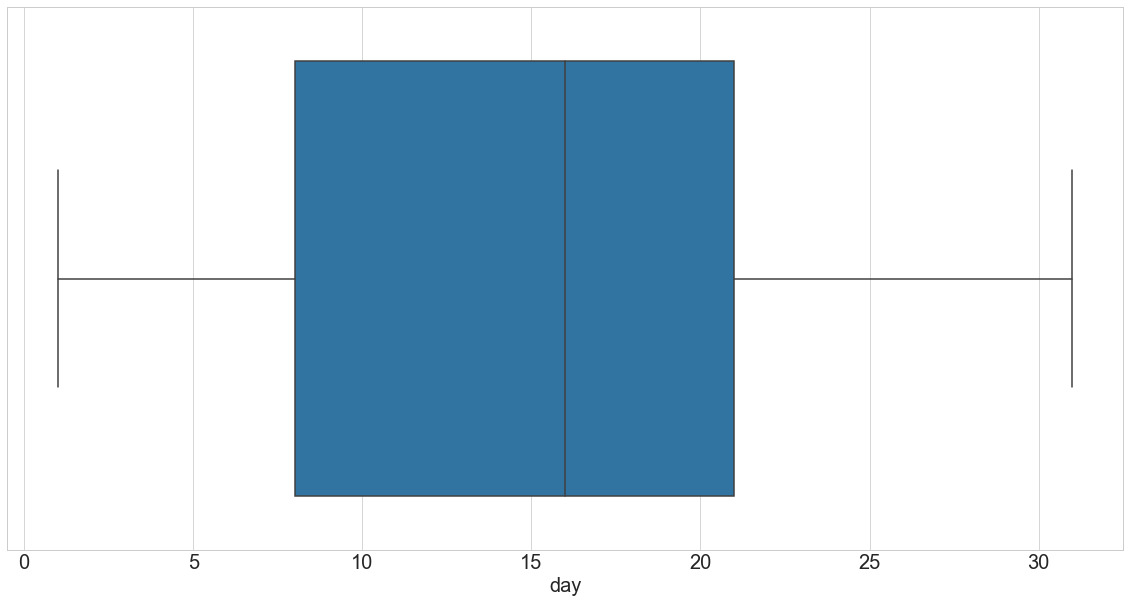

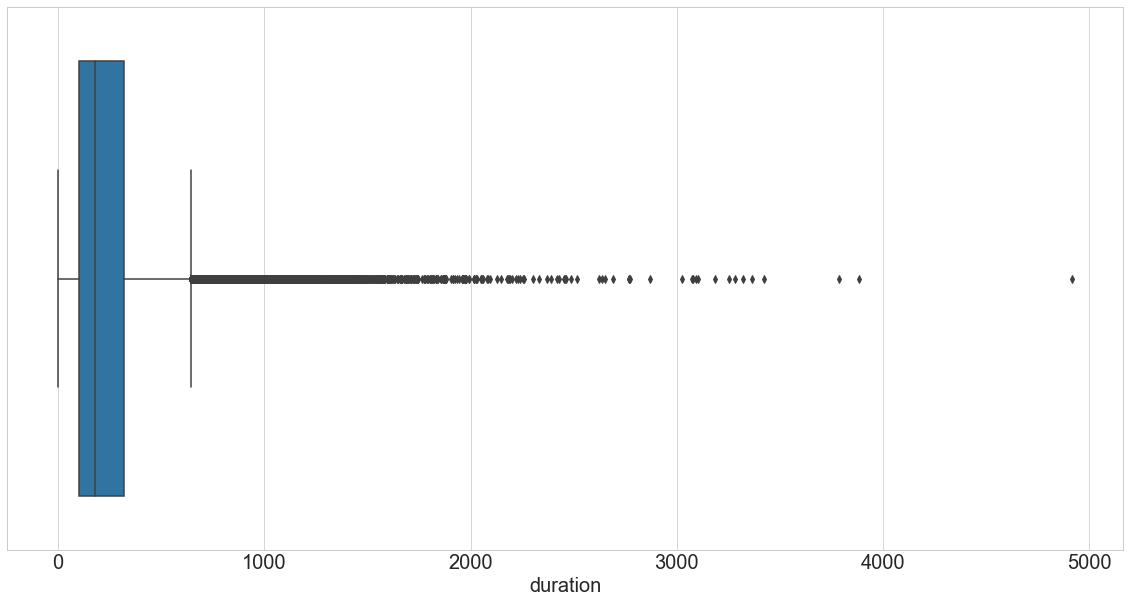

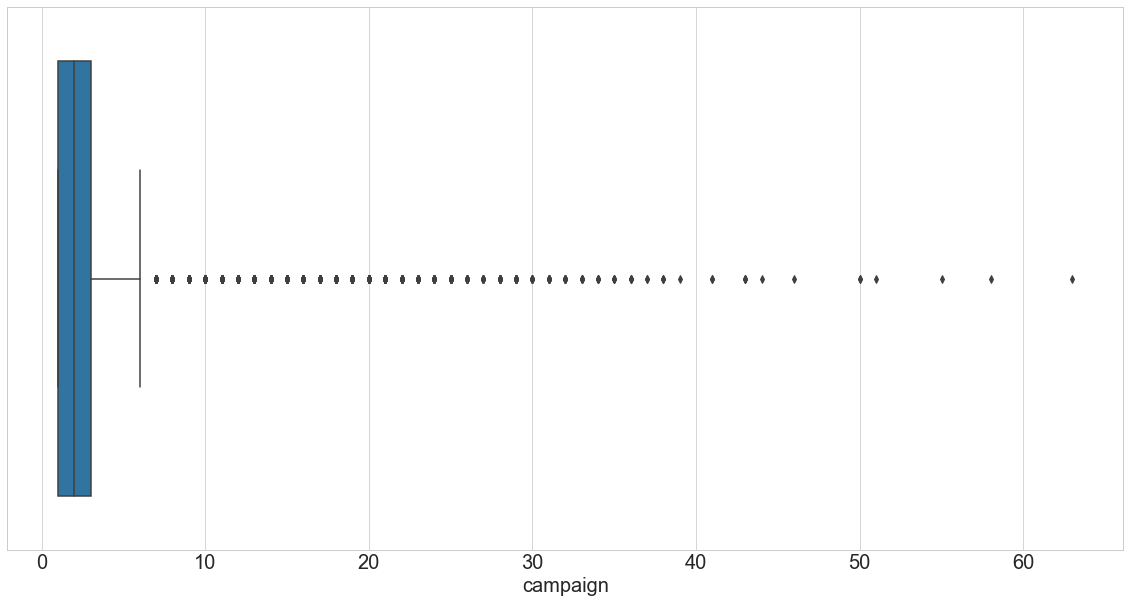

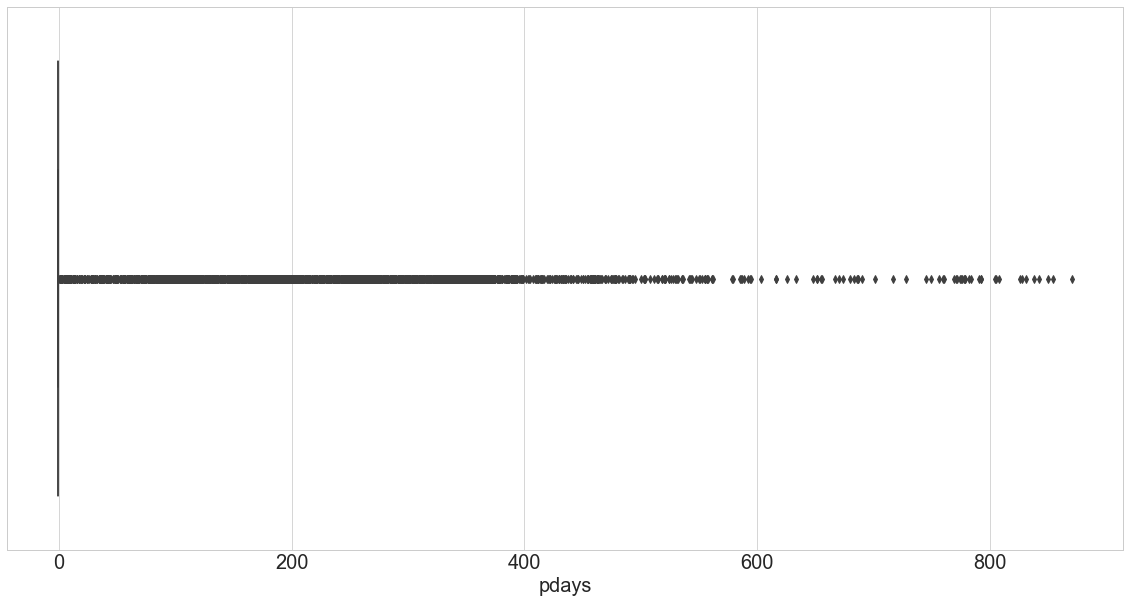

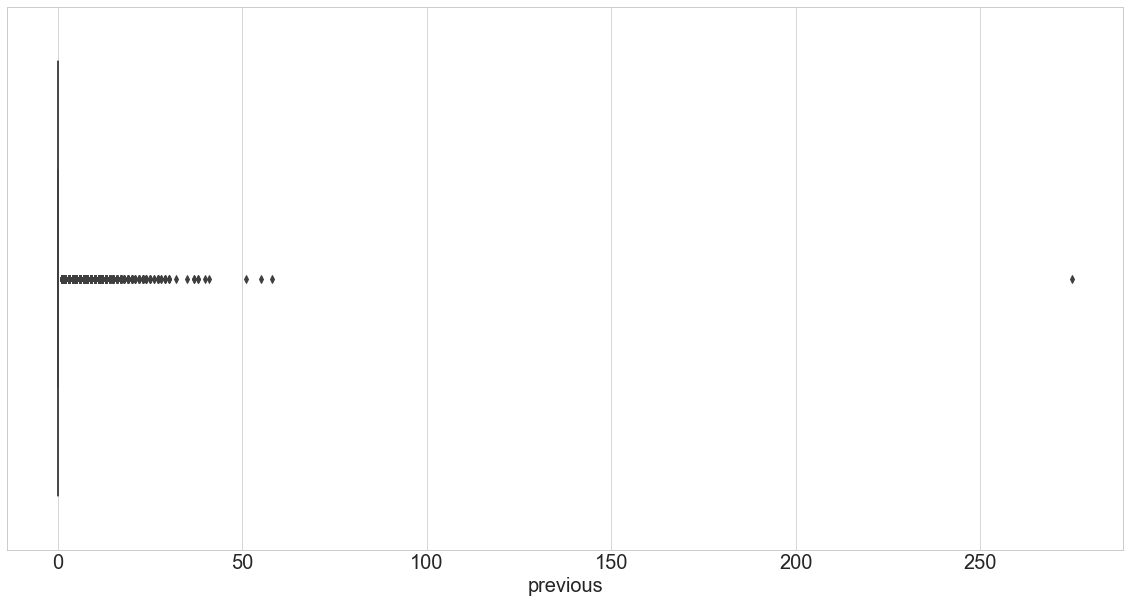

In [ ]:
for feature in numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    sns.boxplot(Bank[feature])
    plt.xlabel(feature)
    plt.show()
    print("                                                                                           ")

There are outliers in all the numerical attributes except the day feature.
The outliers will not be replaced with another vales as they represen most of the numerical data in the attributes.

# Correlation matrix of numerical features

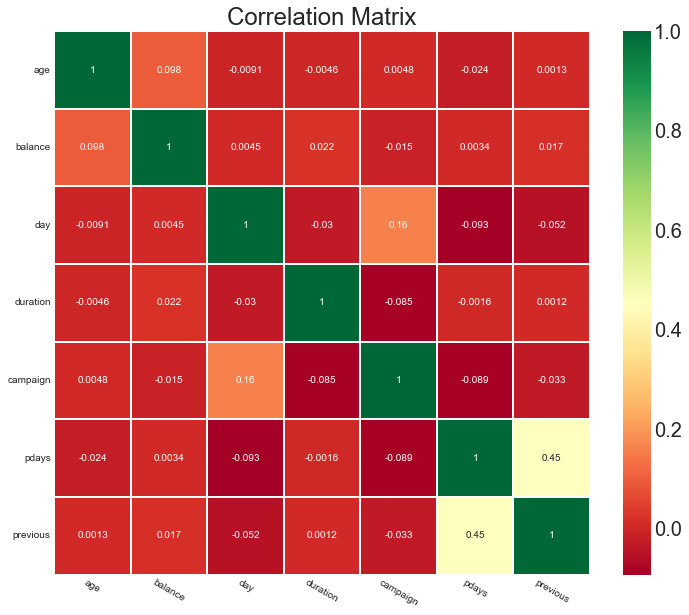

In [ ]:
Correlation_data = Bank[numeric_features + ['y']]
corr = Correlation_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

All the features have very less correlation between them

comparitively pdays and previous have higher correlation and duration have a higher correlation with our target variable

# Outlier detection for numerical attributes using IQR

In [ ]:
Bank_numerical = Bank[numeric_features]
Bank_numerical.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
q3 = Bank_numerical.quantile(0.75)
q1 = Bank_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [ ]:
Bank_out = Bank[~((Bank_numerical < (q1 - 1.5 * iqr)) |(Bank_numerical > (q3 + 1.5 *
iqr))).any(axis=1)]
print('{} outliers based on IQR'.format(Bank.shape[0] - Bank_out.shape[0]))

17018 outliers based on IQR


# check for duplicate values

In [ ]:
Bank.duplicated().sum()

0

There are no dupicates in the dataset.

# Encoding

# #Label Encoding For Categorical Attributes

In [ ]:
label_encoding = {
    "y":{"no":0,"yes":1},
    "poutcome":{"unknown":0,"failure":1,"other":2,"success":3},
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "contact":{"unknown":0,"cellular":1,"telephone":2},
    "loan":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
    "default":{"no":0,"yes":1},
    "education":{"tertiary":0,"secondary":1,"unknown":2,"primary":3},
    "marital":{"married":0,"single":1,"divorced":2},
    "job":{"management":0,"technician":1,"entrepreneur":2,"blue-collar":3,"unknown":4,"retired":5,"admin.":6,"services":7,"self-employed":8,"unemployed":9,"housemaid":10,"student":11}
}

In [ ]:
Bank_encoded = Bank.replace(label_encoding)

In [ ]:
Bank_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,1,0,0,5,4,261,1,-1,0,0,0
1,44,1,1,1,0,29,1,0,0,5,4,151,1,-1,0,0,0
2,33,2,0,1,0,2,1,1,0,5,4,76,1,-1,0,0,0
3,47,3,0,2,0,1506,1,0,0,5,4,92,1,-1,0,0,0
4,33,4,1,2,0,1,0,0,0,5,4,198,1,-1,0,0,0


# Normalization

In [ ]:
##MinMax Scaling for Numerical attributes

In [ ]:
numeric_features=['age', 'balance', 'day', 'duration','campaign', 'pdays', 'previous']

scaler = MinMaxScaler(feature_range=(0, 1))

Bank_encoded[numeric_features] = scaler.fit_transform(Bank_encoded[numeric_features])

In [ ]:
Bank_normalized = Bank_encoded
Bank_normalized.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0,0,0,0,0.092259,1,0,0,0.133333,4,0.053070,0.0,0.0,0.0,0,0
1,0.337662,1,1,1,0,0.073067,1,0,0,0.133333,4,0.030704,0.0,0.0,0.0,0,0
2,0.194805,2,0,1,0,0.072822,1,1,0,0.133333,4,0.015453,0.0,0.0,0.0,0,0
3,0.376623,3,0,2,0,0.086476,1,0,0,0.133333,4,0.018707,0.0,0.0,0.0,0,0
4,0.194805,4,1,2,0,0.072812,0,0,0,0.133333,4,0.040260,0.0,0.0,0.0,0,0


# Feature Selection

# #Feature Selection For Numeric Features

In [ ]:
numeric_features = np.array(Bank.select_dtypes(include='int64').columns)
num_k = 'all'

# ANOVA feature selection for numeric features
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
num_fs = SelectKBest(score_func=f_classif, k=num_k)

# apply feature selection
filtered_data = num_fs.fit_transform(Bank[numeric_features] , Bank['y'])
print(filtered_data.shape)

(45211, 7)


age : 28.625233
balance : 126.572276
day : 36.359010
duration : 8333.761148
campaign : 243.358404
pdays : 490.696563
previous : 396.443989


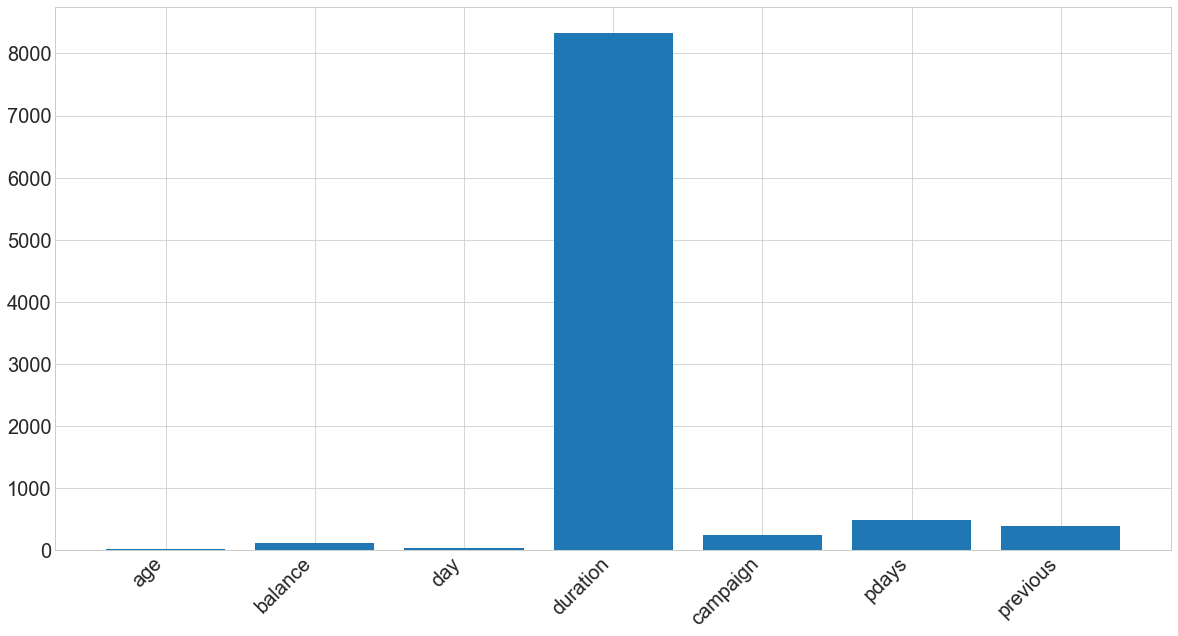

In [ ]:
for i in range(len(num_fs.scores_)):
    print(numeric_features[i] + ' : %f' % ( num_fs.scores_[i]))

# plot the scores
fig = plt.subplots(figsize=(20, 10))
plt.rcParams.update({'font.size': 20})
plt.bar(numeric_features, num_fs.scores_)
plt.xticks(rotation=45, ha='right')
plt.show()

The "duration" attribute highly affects the output target.But this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# #Feature Selection For Categorical Features

In [ ]:
cat_features = np.array(Bank.select_dtypes(include='object').columns)

# Chi-Squared Test feature selection for categorical
from sklearn import feature_selection

cat_k = 'all'
if cat_features[-1] == 'y':
  cat_features = cat_features[0:-1]

cat_fs = SelectKBest(score_func=feature_selection.chi2, k=cat_k)
cat_fs.fit(Bank_encoded[cat_features], Bank_encoded['y'])
df_cat_fs = cat_fs.transform(Bank_encoded[cat_features])

job : 61.733938
marital : 81.314991
education : 139.191231
default : 0.132483
housing : 388.949715
loan : 176.516137
contact : 300.161142
month : 17.851622
poutcome : 5113.204667


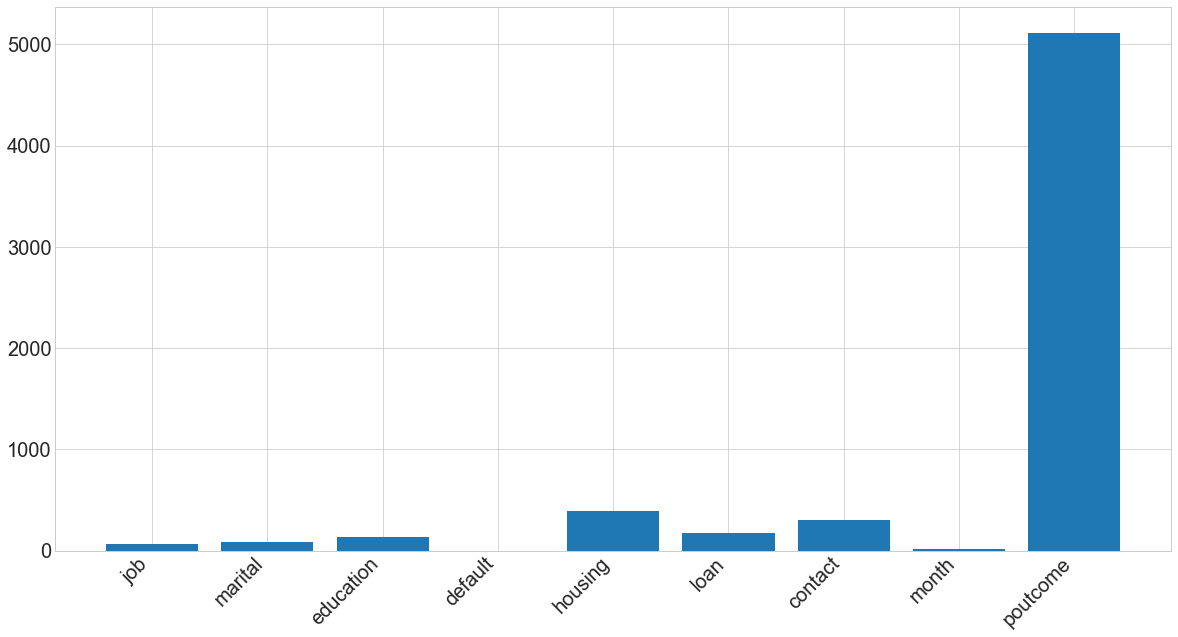

In [ ]:
for i in range(len(cat_fs.scores_)):
    print(cat_features[i] + ' : %f' % ( cat_fs.scores_[i]))

# plot the scores
fig = plt.subplots(figsize=(20, 10))
plt.rcParams.update({'font.size': 20})
plt.bar(cat_features, cat_fs.scores_)
plt.xticks(rotation=45, ha='right')
plt.show()

The "poutcome" attribute highly affects the output target.

# Preparing And Splitting The Data

In [ ]:
Bank1=Bank_normalized
Bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0,0,0,0,0.092259,1,0,0,0.133333,4,0.053070,0.0,0.0,0.0,0,0
1,0.337662,1,1,1,0,0.073067,1,0,0,0.133333,4,0.030704,0.0,0.0,0.0,0,0
2,0.194805,2,0,1,0,0.072822,1,1,0,0.133333,4,0.015453,0.0,0.0,0.0,0,0
3,0.376623,3,0,2,0,0.086476,1,0,0,0.133333,4,0.018707,0.0,0.0,0.0,0,0
4,0.194805,4,1,2,0,0.072812,0,0,0,0.133333,4,0.040260,0.0,0.0,0.0,0,0


In [ ]:
feature_set = ['age',	'job',	'marital',	'education',	'default',	'balance',
               'housing',	'loan',	'contact',	'day',	'month',	'duration',	'campaign',	'pdays',	'previous',	'poutcome']

# SPLITTING THE DATA

In [ ]:
# get all the features
features = [feat for feat in Bank1.columns if feat !='y']

x = Bank1[feature_set] # feature set
y = Bank1['y'] # target

# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# train and test datasets dimensions
x_train.shape, x_test.shape

((36168, 16), (9043, 16))

# Oversampling

Oversampling is done as the data is imbalanced

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7,random_state=42)
smote=SMOTE()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

The number of Classes before fit Counter({0: 27956, 1: 3691})
The number of Classes after fit Counter({0: 27956, 1: 27956})


# Model Building

In [ ]:
Classifiers_list = []
Classifiers_var_list = []
Accuracy_list = []
Precision_list = []
Recall_list = []
Auc_list = []
# dictionary to store accuracy and roc score for each model
score = {}

# Hyper parameter tuning

# Logistic Regression

**Hyperparameter tuning Logistic Regression**

# Logistic Regression¶

In [ ]:
from sklearn.linear_model import LogisticRegression # Import Logistic Regression machine learning library
log_model1 = LogisticRegression()

# Apply training data to the logistic regression model
log_model1.fit(x_train, y_train)

#Predict the test results
y_predict = log_model1.predict(x_test)

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, log_model1.coef_[0][idx]))

The coefficient for age is -0.06477946207690567
The coefficient for job is 0.02215281533768425
The coefficient for marital is 0.1425612122313148
The coefficient for education is -0.18213714786097598
The coefficient for default is 0.0
The coefficient for balance is 0.6220186308225284
The coefficient for housing is -0.8693536885590439
The coefficient for loan is -0.6296371309175343
The coefficient for contact is 0.6410981178854618
The coefficient for day is -0.15170258425853655
The coefficient for month is -0.009109385173278552
The coefficient for duration is 17.384068698350564
The coefficient for campaign is -2.93857521586684
The coefficient for pdays is -1.4029343204383766
The coefficient for previous is -0.13239162629020032
The coefficient for poutcome is 0.8837300402249951


In [ ]:
# Let us check the intercept for the model

intercept = log_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.399419855965585


In [ ]:
# Calculate the model score and print confusion matrix

log_model1_score = log_model1.score(x_test, y_test)
print("The Logistic Regression model accuracy is {}".format(log_model1_score))

The Logistic Regression model accuracy is 0.8959746387496313


In [ ]:
print("The confustion matrix for Logistic Regression is")
print(metrics.confusion_matrix(y_test, y_predict))

The confustion matrix for Logistic Regression is
[[11711   255]
 [ 1156   442]]


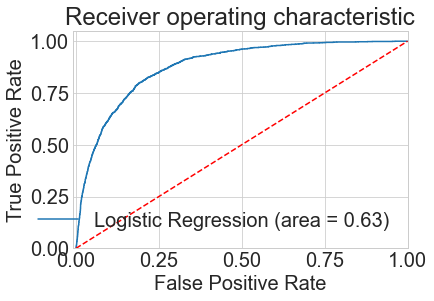

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_model1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the confusion matrix results, we can see the below observations.

True negative is 11711 & True postive is 442. False postive is 255 & False negative is 1162.

# K - Nearest Neighbors Model:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model1= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
knn_model1.fit(x_train, y_train)
y_pred_knn = knn_model1.predict(x_test)
knn_model1_score = knn_model1.score(x_test, y_test)
print("The KNN model accuracy is {}".format(knn_model1_score))
print("The confusion matrix of KNN model is")
print(metrics.confusion_matrix(y_test,y_pred_knn))

The KNN model accuracy is 0.8808611029194928
The confusion matrix of KNN model is
[[11479   487]
 [ 1129   469]]


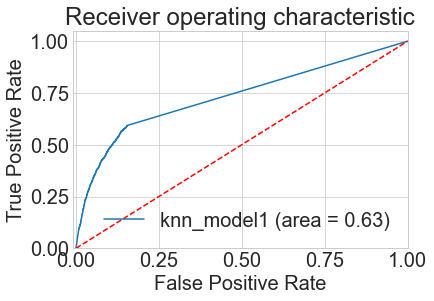

In [ ]:
knn_model1_roc_auc = roc_auc_score(y_test, knn_model1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_model1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='knn_model1 (area = %0.2f)' % knn_model1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(x_train, y_train)
test_pred = rfcl.predict(x_test)
rfcl_score=rfcl.score(x_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.8953111176644057
The confusion matrix of Random Forest Model is
[[11874    92]
 [ 1328   270]]


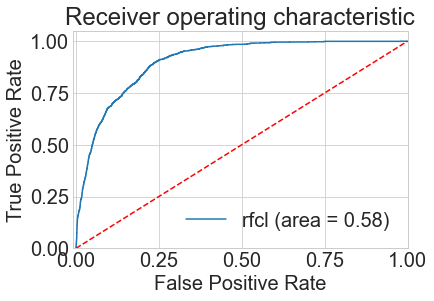

In [ ]:
rfcl_roc_auc = roc_auc_score(y_test, rfcl.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rfcl.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='rfcl (area = %0.2f)' % rfcl_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# GradientBoost Classifier Algorithm

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score=gbcl.score(x_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.8991447950457092
The confusion matrix of Gradient Boost classifier model is
[[11720   246]
 [ 1122   476]]


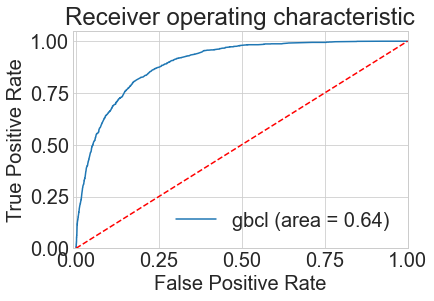

In [ ]:
gbcl_roc_auc = roc_auc_score(y_test, gbcl.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gbcl.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='gbcl (area = %0.2f)' % gbcl_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.897670303745208
The confusion matrix of Bagging classifier model is
[[11522   444]
 [  944   654]]


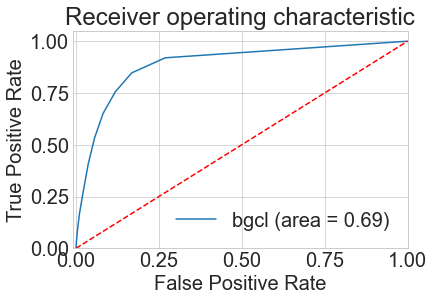

In [ ]:
bgcl_roc_auc = roc_auc_score(y_test, bgcl.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, bgcl.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='bgcl (area = %0.2f)' % bgcl_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Comparision of Models

In [ ]:
print("Logistic Regression model: {}".format(log_model1_score))

print("KNN model: {}".format(knn_model1_score))

print("The Gradient Boost classifier model {}".format(gbcl_score))

print("The Random forest model {}".format(rfcl_score))

print("The Bagging classifier model {}".format(bgcl_score))

Logistic Regression model: 0.8959746387496313
KNN model: 0.8808611029194928
The Gradient Boost classifier model 0.8991447950457092
The Random forest model 0.8953111176644057
The Bagging classifier model 0.897670303745208


The Gradient Boost classifier model ranks the best followed by The Bagging classifier model 0.897670303745208